In [1]:
#visualize predictions with confidence score

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import load_model

In [3]:
# load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_test = x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
model = load_model('/content/drive/MyDrive/cnn_cifar10_model.h5')

In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [14]:
# get  predictions on a batch
num_images=12
images = x_test[:num_images]
true_labels = y_test[:num_images].flatten()

# get predicted probabilities
pred_probs=model.predict(images)
pred_labels=np.argmax(pred_probs, axis=1)
confidence_score = np.max(pred_probs, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


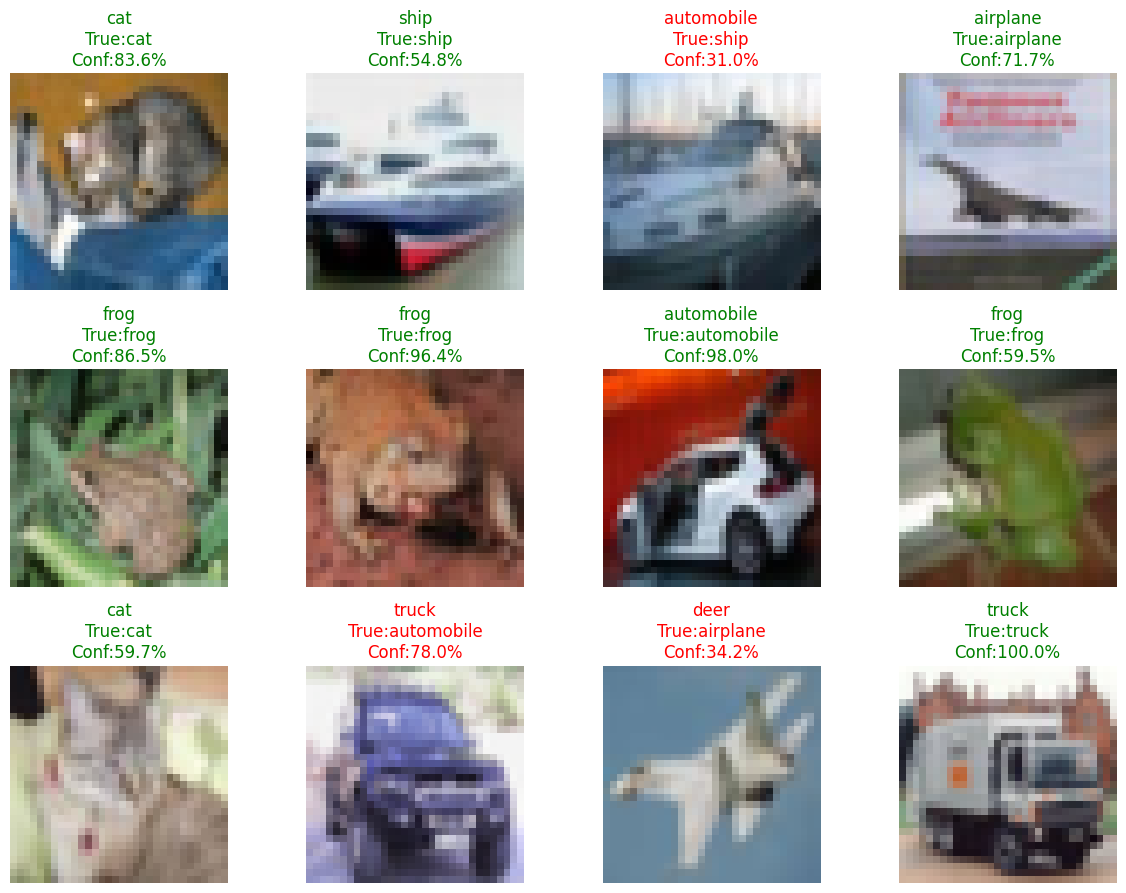

In [15]:
plt.figure(figsize=(12,12))
for i in range(num_images):
  plt.subplot(4,4,i+1)
  plt.imshow(images[i])
  pred_class=class_names[pred_labels[i]]
  true_class=class_names[true_labels[i]]
  confidence=confidence_score[i]*100

  color='green' if pred_labels[i]==true_labels[i] else 'red'
  plt.title(f'{pred_class}\nTrue:{true_class}\nConf:{confidence:.1f}%', color=color)
  plt.axis('off')

plt.tight_layout()
plt.show()